In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import Audio
np.random.seed(100)
plt.style.use("classic")

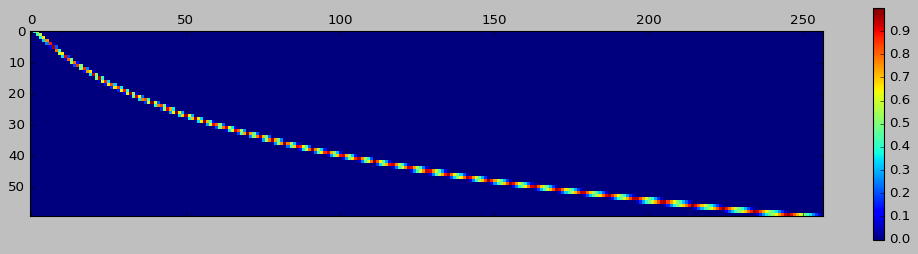

In [3]:
import kaldifeats.feats as F
keywords = {'num_mel_bins': 60, 
            'sample_frequency': 16000,
            'frame_length': 400}
fbanks = F.get_mel_filterbanks(**keywords)
plt.matshow(fbanks.T)
plt.colorbar()
plt.show()

200000


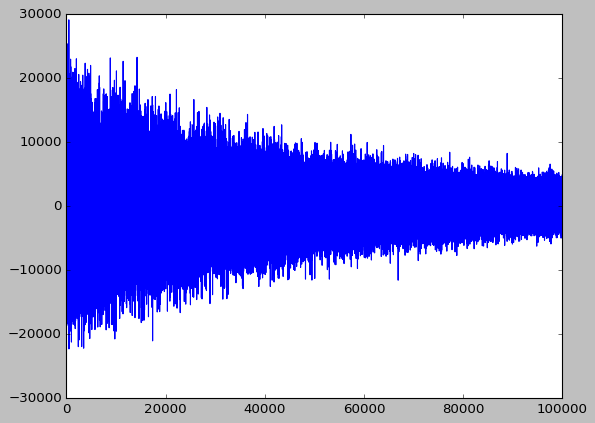

In [4]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
x *= 1000
x = x.astype(np.int16)
plt.plot(x)
plt.show()

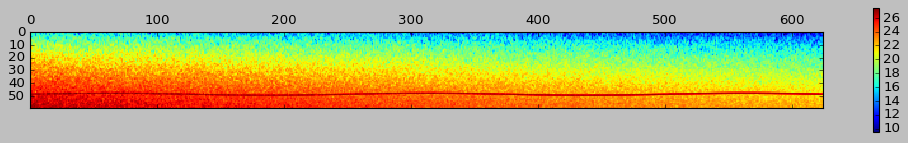

In [5]:
import kaldifeats.feats as F
keywords = {'window_type': 'povey',
            'dither': 0.0,
            'snip_edges': False,
            'preemphasis_coefficient': 0.97,
            'use_energy': False,
            'raw_energy': False,
            'num_mel_bins': 60,
            'sample_frequency': 16000,
            'round_to_power_of_two': True,
            }
fbank = F.log_fbank_feats(x[:],
                          frame_length=400,
                          frame_shift=160,
                          mode='kaldi_power',
                          detrend='constant',
                          **keywords)
plt.matshow(fbank.T)
plt.colorbar()
plt.show()

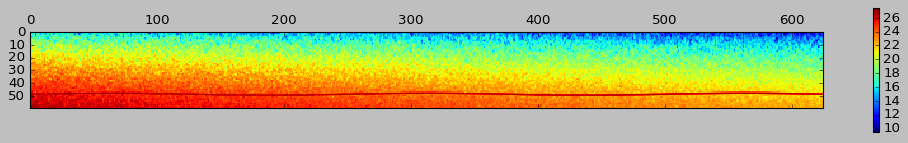

In [6]:
import kaldifeats.commands as C
fbank2 = C.fbank_feats(x[:],
                       frame_length_ms=25,
                       frame_shift_ms=10,
                       remove_dc_offset=True,
                       **keywords)
plt.matshow(fbank2.T)
plt.colorbar()
plt.show()

Diff stats:
DescribeResult(nobs=37500, minmax=(-7.9355667592651e-05, 6.789640242033101e-05), mean=-9.93856451560949e-07, variance=2.2198536916054225e-11, skewness=0.32958939154855366, kurtosis=17.204356322056828)


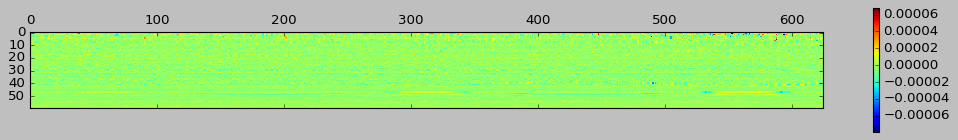

300000


In [7]:
diff = fbank - fbank2
import scipy.stats
print(f'Diff stats:\n{scipy.stats.describe(diff, axis=None)}')
plt.matshow(diff.T)
plt.colorbar()
plt.show()
